In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [3]:
#Importing Dataset
df = pd.read_excel("glass.xlsx",engine="openpyxl")

In [4]:
#Data Preprocessing
df=df.dropna()

target_col = "Type"

print("\nData Shape : \n",df.shape)
print("\nData Information : \n",df.info())
print("\nData Description : \n",df.describe())
print("\nFirst Values of Data : \n",df.head())


Data Shape : 
 (214, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB

Data Information : 
 None

Data Description : 
                RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
m

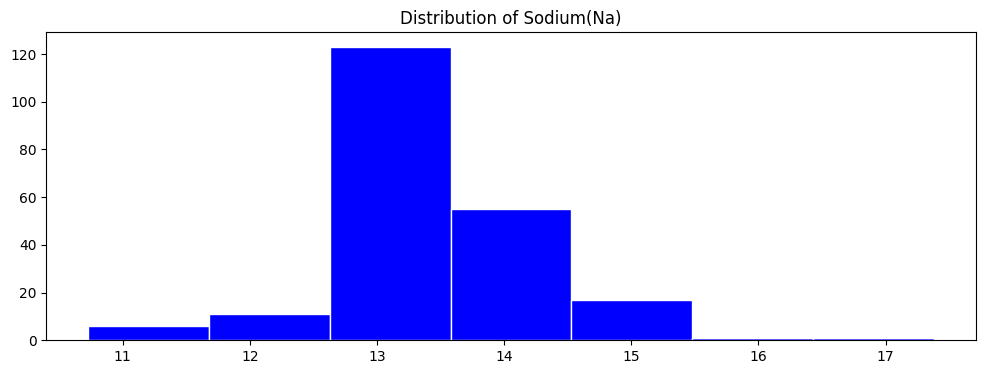

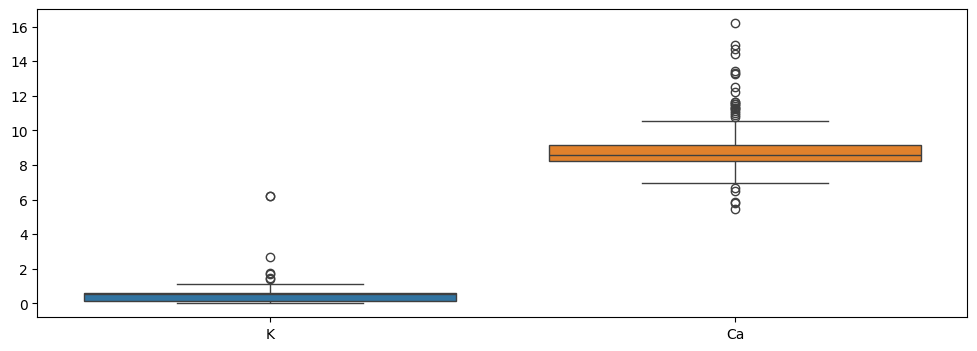

<Figure size 1200x400 with 0 Axes>

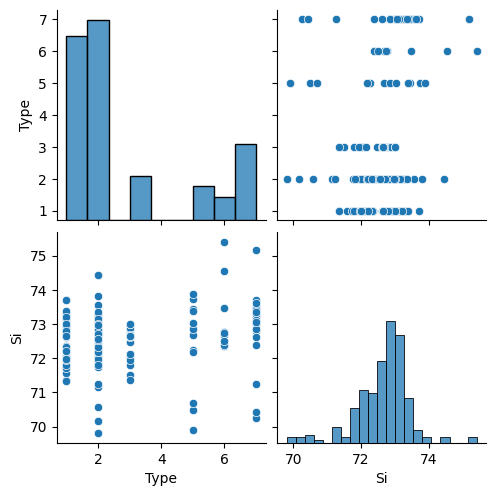

In [5]:
#Data Visualizations
plt.figure(figsize=(12,4))
plt.hist(df["Na"],bins=7,color="Blue",edgecolor="White")
plt.title("Distribution of Sodium(Na)")
plt.show()

plt.figure(figsize=(12,4))
sns.boxplot(data=df[["K","Ca"]])
plt.show()

plt.figure(figsize=(12,4))
sns.pairplot(data=df[["Type","Si"]])
plt.show()

In [6]:
#Encoding and Scaling
cat_features = df.select_dtypes(include=["object"]).columns
num_features = df.select_dtypes(include=["int64","float64"]).columns

df = pd.get_dummies(df,columns=cat_features,drop_first=True)

scaler = StandardScaler()
df[num_features]=scaler.fit_transform(df[num_features])

In [7]:
#Train-Test Split
X = df.drop(target_col,axis=1)
y = df[target_col].astype(int)

X  = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


Random Forest Accuracy :  0.9767441860465116

Random Forest Precision Score :  0.9775461106655975

Random Forest Recall Score :  0.9767441860465116

Random Forest F1 Score :  0.9760537300316982


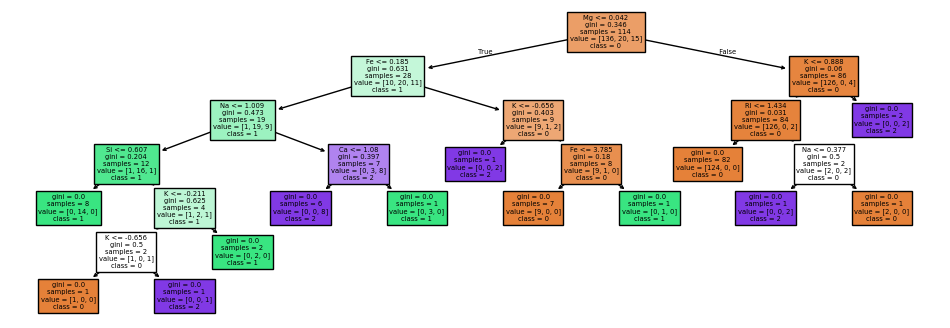

In [8]:
#Creating Random Forest model
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)

y_pred = rf_model.predict(X_test)

print("\nRandom Forest Accuracy : ",accuracy_score(y_test,y_pred))
print("\nRandom Forest Precision Score : ",precision_score(y_test,y_pred,average="weighted"))
print("\nRandom Forest Recall Score : ",recall_score(y_test,y_pred,average="weighted"))
print("\nRandom Forest F1 Score : ",f1_score(y_test,y_pred,average="weighted"))

plt.figure(figsize=(12,4))
plot_tree(rf_model.estimators_[0],feature_names = X.columns,class_names = [str(c) for c in y.unique()],filled=True)
plt.show()

In [9]:
#Creating Bagging Classifier
bagging = BaggingClassifier(estimator=RandomForestClassifier(),n_estimators=10,random_state=42)
bagging.fit(X_train,y_train)
y_pred_bag = bagging.predict(X_test)

print("\n---------Bagging Results----------\n")
print("\nBagging Accuracy : ",accuracy_score(y_test,y_pred_bag))
print("\nBagging Precision Score : ",precision_score(y_test,y_pred_bag,average="weighted"))
print("\nBagging Recall Score : ",recall_score(y_test,y_pred_bag,average="weighted"))
print("\nBagging F1 Score : ",f1_score(y_test,y_pred_bag,average="weighted"))


---------Bagging Results----------


Bagging Accuracy :  0.9534883720930233

Bagging Precision Score :  0.9565891472868217

Bagging Recall Score :  0.9534883720930233

Bagging F1 Score :  0.9504143277198611


In [10]:
#Creating AdaBoost Classifier
adaboost = AdaBoostClassifier(n_estimators=100,learning_rate=0.1,random_state=42)
adaboost.fit(X_train,y_train)
y_pred_ada = adaboost.predict(X_test)

print("\n---------Adaboost Results----------\n")
print("\nAdaboost Accuracy : ",accuracy_score(y_test,y_pred_ada))
print("\nAdaboost Precision Score : ",precision_score(y_test,y_pred_ada,average="weighted"))
print("\nAdaboost Recall Score : ",recall_score(y_test,y_pred_ada,average="weighted"))
print("\nAdaboost F1 Score : ",f1_score(y_test,y_pred_ada,average="weighted"))


---------Adaboost Results----------


Adaboost Accuracy :  0.8604651162790697

Adaboost Precision Score :  0.848062015503876

Adaboost Recall Score :  0.8604651162790697

Adaboost F1 Score :  0.851242983159583


In [11]:
#Create Gradient Boosting Classifier
gradient = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,random_state=42)
gradient.fit(X_train,y_train)
y_pred_grad = gradient.predict(X_test)

print("\n---------XGBoost Results----------\n")
print("\nXGBoost Accuracy : ",accuracy_score(y_test,y_pred_grad))
print("\nXGBoost Precision Score : ",precision_score(y_test,y_pred_grad,average="weighted"))
print("\nXGBoost Recall Score : ",recall_score(y_test,y_pred_grad,average="weighted"))
print("\nXGBoost F1 Score : ",f1_score(y_test,y_pred_grad,average="weighted"))



---------XGBoost Results----------


XGBoost Accuracy :  0.9302325581395349

XGBoost Precision Score :  0.9289405684754521

XGBoost Recall Score :  0.9302325581395349

XGBoost F1 Score :  0.9282331895190993


In [ ]:
"""1. Explain Bagging and Boosting methods. How are they different? 

Bagging (Bootstrap Aggregating) is an ensemble method that reduces variance in predictions.

It creates multiple bootstrap samples from the dataset and trains a separate model on each.

The final prediction is made by averaging (regression) or voting (classification).

Random Forest is a popular example of bagging.

Boosting, on the other hand, trains models sequentially.

Each new model focuses on correcting the errors of the previous model.

Boosting reduces bias and can achieve high accuracy.

Examples include AdaBoost, Gradient Boosting, and XGBoost.

Bagging works in parallel; boosting works sequentially.

Bagging reduces variance, boosting reduces bias.

2. Explain how to handle imbalance in data. 

Data imbalance occurs when one class has significantly more samples than another.

It leads to biased models that favor the majority class.

One method is oversampling, such as Duplicate sampling or SMOTE.

Another method is undersampling to reduce majority class size.

Use class weights to penalize misclassifying minority samples.

Apply ensemble methods like Balanced Random Forest or EasyEnsemble.

Use anomaly detection for extremely skewed datasets.

Generate more synthetic data for minority class when possible.

Evaluate with proper metrics like Precision, Recall, F1, and AUC instead of accuracy.

Combine multiple techniques for best results depending on dataset."""